In [1]:
import pandas as pd

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
years = [2019, 2020, 2021, 2022, 2023, 2024]

# Monthly seat occupancy rates
monthly_occupancy = {
    2019: [80.2, 81.4, 82.1, 82.6, 83.0, 83.4, 84.0, 83.7, 82.5, 81.9, 80.8, 80.0],
    2020: [79.5, 78.0, 65.2, 25.3, 30.1, 40.0, 55.6, 58.2, 60.4, 63.1, 64.2, 65.1],
    2021: [66.3, 67.1, 67.4, 67.8, 68.2, 68.5, 69.0, 70.1, 71.0, 72.2, 72.5, 73.0],
    2022: [78.0, 79.0, 80.5, 81.0, 81.6, 82.2, 83.1, 83.5, 83.0, 82.4, 81.3, 80.8],
    2023: [81.1, 81.5, 82.2, 82.7, 83.3, 84.1, 85.0, 84.8, 83.7, 83.1, 82.4, 81.9],
    2024: [82.0, 82.5, 83.0, 83.3, 83.7, 84.0, 85.2, 85.4, 84.3, 83.6, 82.9, 82.1]
}

# Monthly passenger numbers (in millions)
monthly_passengers = {
    2019: [6.2, 6.4, 6.6, 6.7, 6.8, 6.9, 7.1, 7.0, 6.8, 6.5, 6.3, 6.0],
    2020: [5.5, 5.2, 1.2, 0.4, 0.6, 1.0, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5],
    2021: [2.8, 3.2, 3.6, 4.0, 4.3, 4.6, 5.1, 5.5, 5.8, 6.0, 6.2, 6.4],
    2022: [6.6, 6.8, 7.0, 7.2, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1],
    2023: [8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2],
    2024: [9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4]
}

# Summer holiday (June, July, August = 1)
summer_holiday_matrix = {
    year: [1 if i in [5, 6, 7] else 0 for i in range(12)] for year in years
}

# Number of public holiday days
holiday_days = {
    2019: [1, 0, 0, 2, 3, 4, 0, 1, 0, 2, 1, 1],
    2020: [1, 0, 0, 2, 4, 3, 1, 2, 1, 1, 1, 1],
    2021: [1, 0, 0, 1, 4, 5, 0, 1, 0, 2, 1, 1],
    2022: [1, 0, 0, 2, 3, 5, 0, 1, 0, 2, 1, 1],
    2023: [1, 0, 0, 2, 4, 4, 0, 1, 0, 2, 1, 1],
    2024: [1, 0, 0, 1, 4, 5, 0, 1, 0, 2, 1, 1]
}

# Inflation and fuel prices
inflation = {
    2019: [1.06, 0.16, 1.03, 1.69, 0.95, 0.03, 1.36, 0.86, 0.99, 2.00, 0.38, 0.74],
    2020: [1.35, 0.35, 0.57, 0.85, 1.36, 1.13, 0.58, 0.86, 0.97, 2.13, 2.30, 1.25],
    2021: [1.68, 0.91, 1.08, 1.68, 0.89, 1.94, 1.80, 1.12, 1.25, 2.39, 3.51, 13.58],
    2022: [11.10, 4.81, 5.46, 7.25, 2.98, 4.95, 2.37, 1.46, 3.08, 3.54, 2.88, 1.18],
    2023: [6.65, 3.15, 2.29, 2.39, 0.04, 3.92, 9.49, 9.09, 4.75, 3.43, 3.28, 2.93],
    2024: [6.70, 4.53, 3.16, 3.18, 3.37, 1.64, 1.36, 1.46, 4.75, 3.43, 3.28, 2.93]
}

fuel_prices = {
    2019: [1.15, 1.12, 1.10, 1.08, 1.09, 1.11, 1.13, 1.14, 1.16, 1.18, 1.20, 1.22],
    2020: [1.23, 1.25, 1.20, 1.10, 1.05, 1.08, 1.12, 1.15, 1.17, 1.19, 1.21, 1.24],
    2021: [1.26, 1.28, 1.30, 1.32, 1.34, 1.36, 1.38, 1.40, 1.42, 1.44, 1.46, 1.48],
    2022: [1.50, 1.52, 1.54, 1.56, 1.58, 1.60, 1.62, 1.64, 1.66, 1.68, 1.70, 1.72],
    2023: [1.74, 1.76, 1.78, 1.80, 1.82, 1.84, 1.86, 1.88, 1.90, 1.92, 1.94, 1.96],
    2024: [1.98, 2.00, 2.02, 2.04, 2.06, 2.08, 2.10, 2.12, 2.14, 2.16, 2.18, 2.20]
}

# Monthly COVID-19 case counts (in thousands)
covid_cases = {
    2019: [0]*12,
    2020: [0, 0, 3, 65, 145, 120, 95, 80, 70, 60, 50, 45],
    2021: [40, 60, 95, 100, 110, 85, 70, 65, 75, 90, 120, 140],
    2022: [180, 160, 140, 100, 85, 60, 40, 30, 20, 15, 10, 5],
    2023: [5, 5, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1],
    2024: [0]*12
}

# Combine all into a DataFrame
data = {
    "Year": [], "Month": [], "Date": [], "Occupancy Rate (%)": [],
    "Passenger Count (Million)": [], "Is Summer Holiday? (1=Yes)": [],
    "Holiday Days Count": [], "Inflation (%)": [], "Fuel Price (USD/Liter)": [],
    "COVID Case Count (Thousand)": []
}

for year in years:
    for i, month in enumerate(months):
        data["Year"].append(year)
        data["Month"].append(month)
        data["Date"].append(pd.to_datetime(f"{year}-{i+1}-01"))
        data["Occupancy Rate (%)"].append(monthly_occupancy[year][i])
        data["Passenger Count (Million)"].append(monthly_passengers[year][i])
        data["Is Summer Holiday? (1=Yes)"].append(summer_holiday_matrix[year][i])
        data["Holiday Days Count"].append(holiday_days[year][i])
        data["Inflation (%)"].append(inflation[year][i])
        data["Fuel Price (USD/Liter)"].append(fuel_prices[year][i])
        data["COVID Case Count (Thousand)"].append(covid_cases[year][i])

df = pd.DataFrame(data)

# Preview first 5 rows
print(df.head())


   Year     Month       Date  Occupancy Rate (%)  Passenger Count (Million)  \
0  2019   January 2019-01-01                80.2                        6.2   
1  2019  February 2019-02-01                81.4                        6.4   
2  2019     March 2019-03-01                82.1                        6.6   
3  2019     April 2019-04-01                82.6                        6.7   
4  2019       May 2019-05-01                83.0                        6.8   

   Is Summer Holiday? (1=Yes)  Holiday Days Count  Inflation (%)  \
0                           0                   1           1.06   
1                           0                   0           0.16   
2                           0                   0           1.03   
3                           0                   2           1.69   
4                           0                   3           0.95   

   Fuel Price (USD/Liter)  COVID Case Count (Thousand)  
0                    1.15                            0  
1 

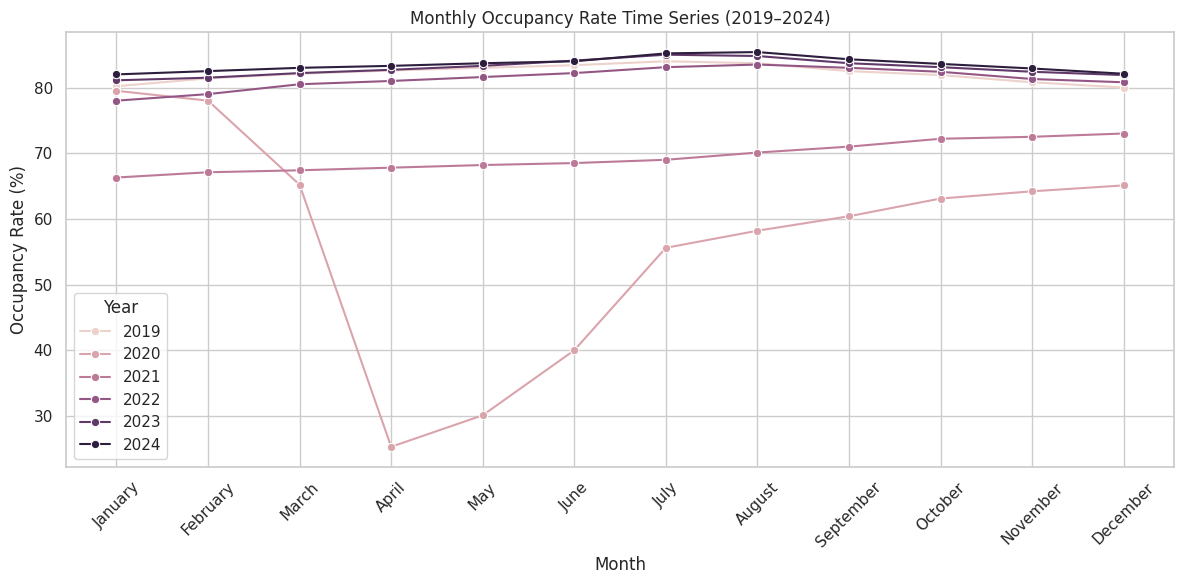

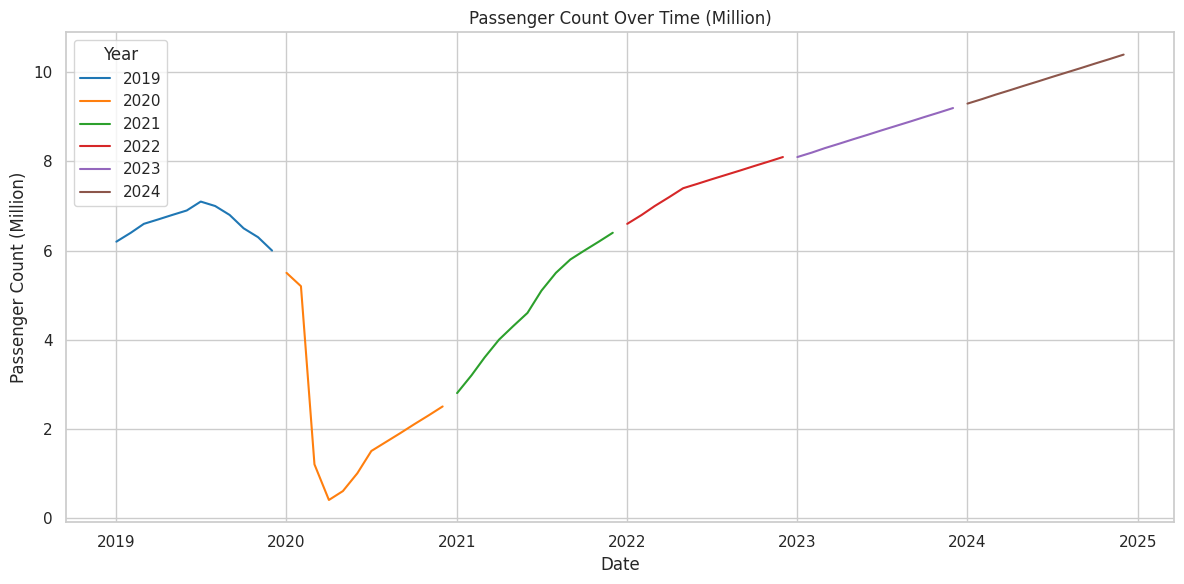

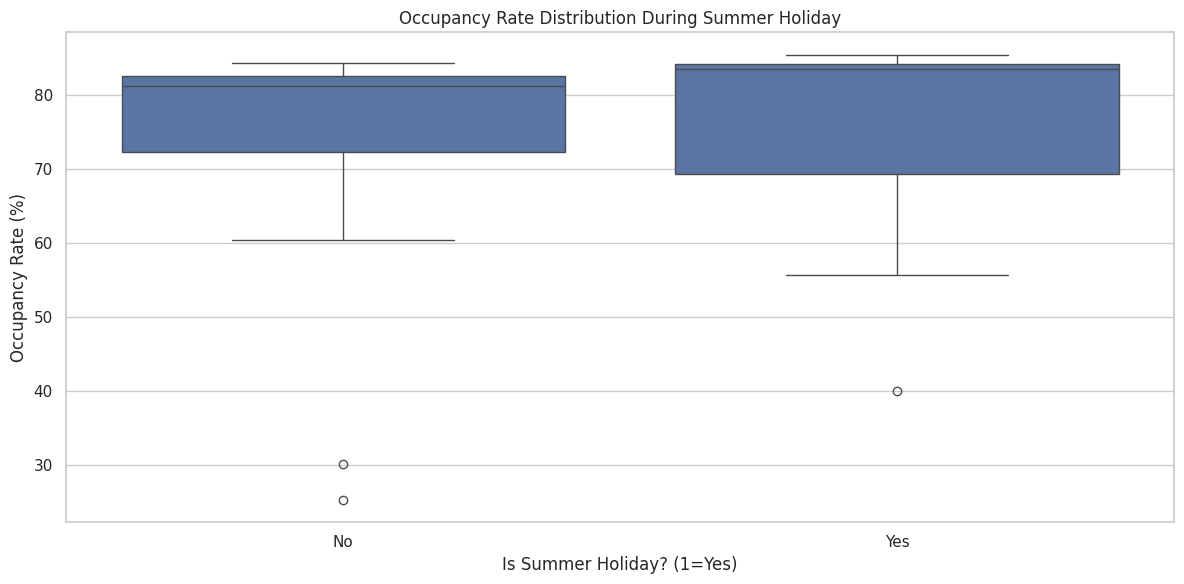

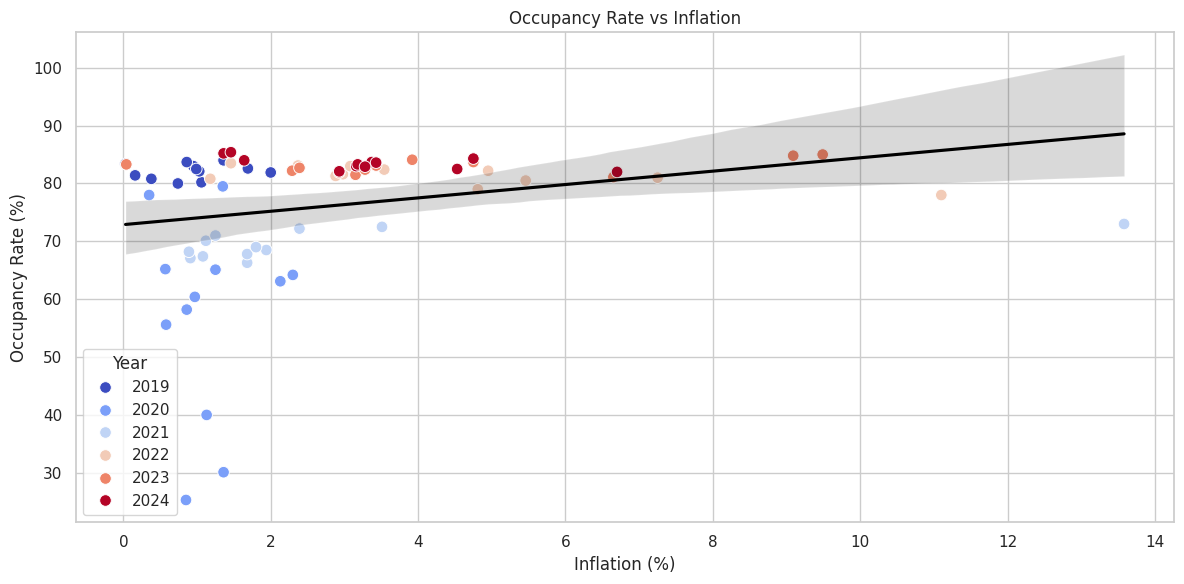

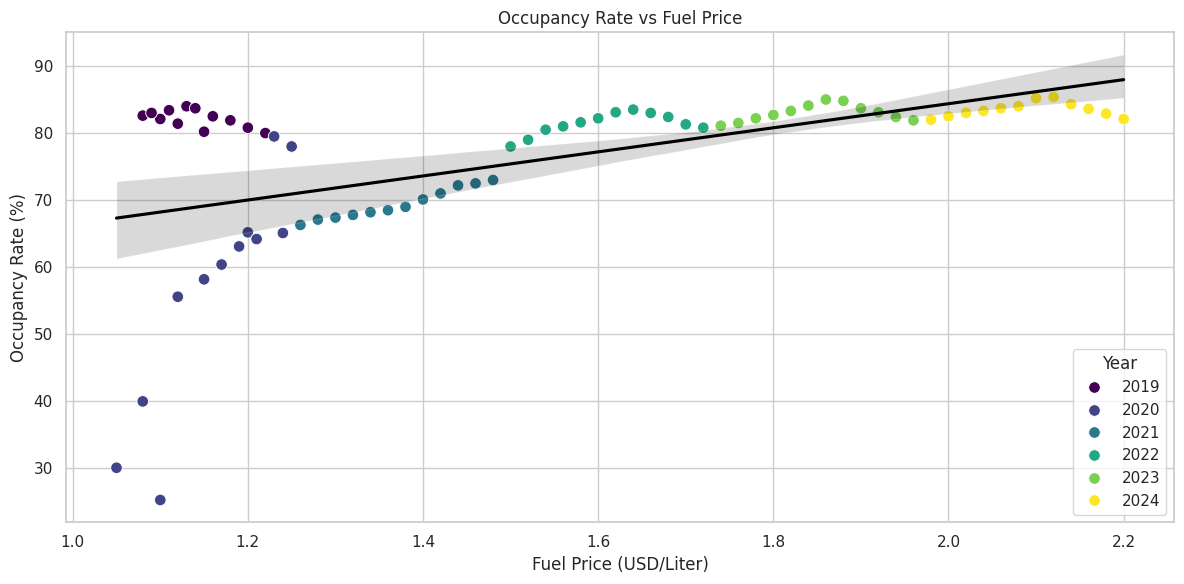

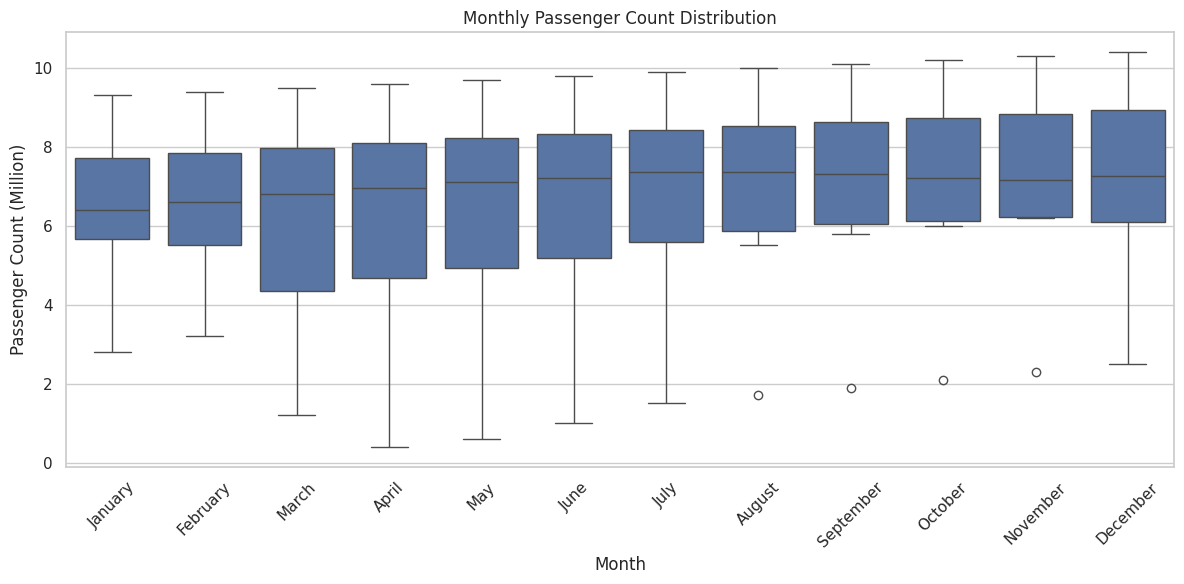

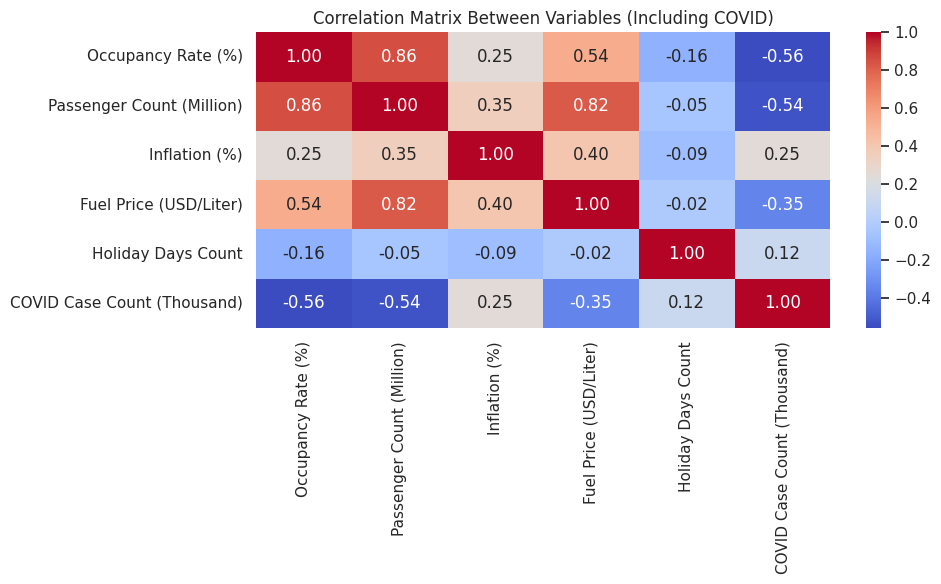

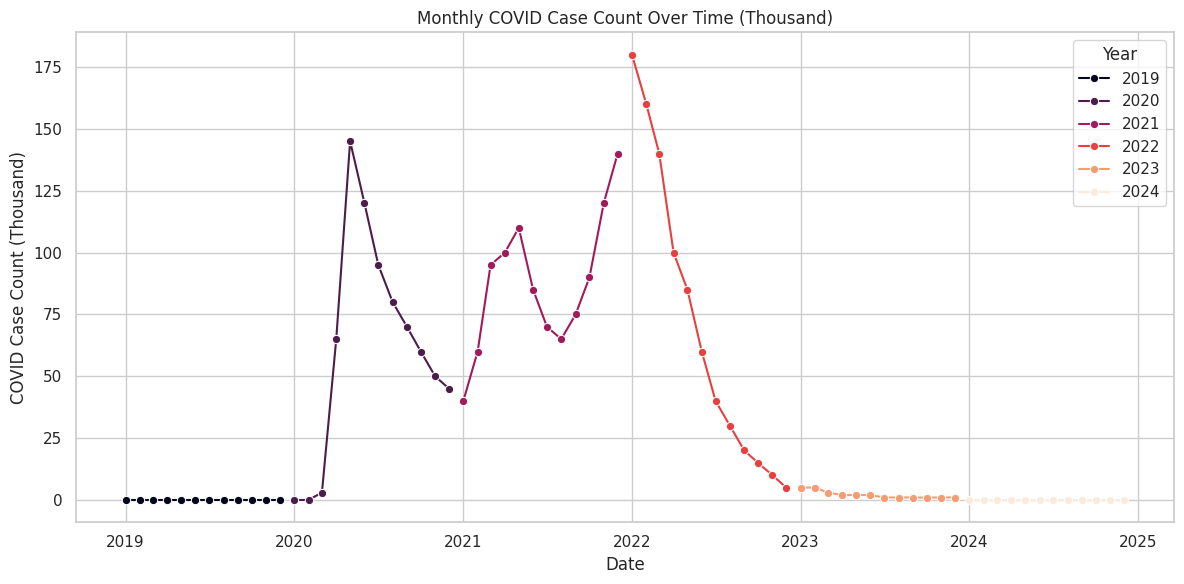

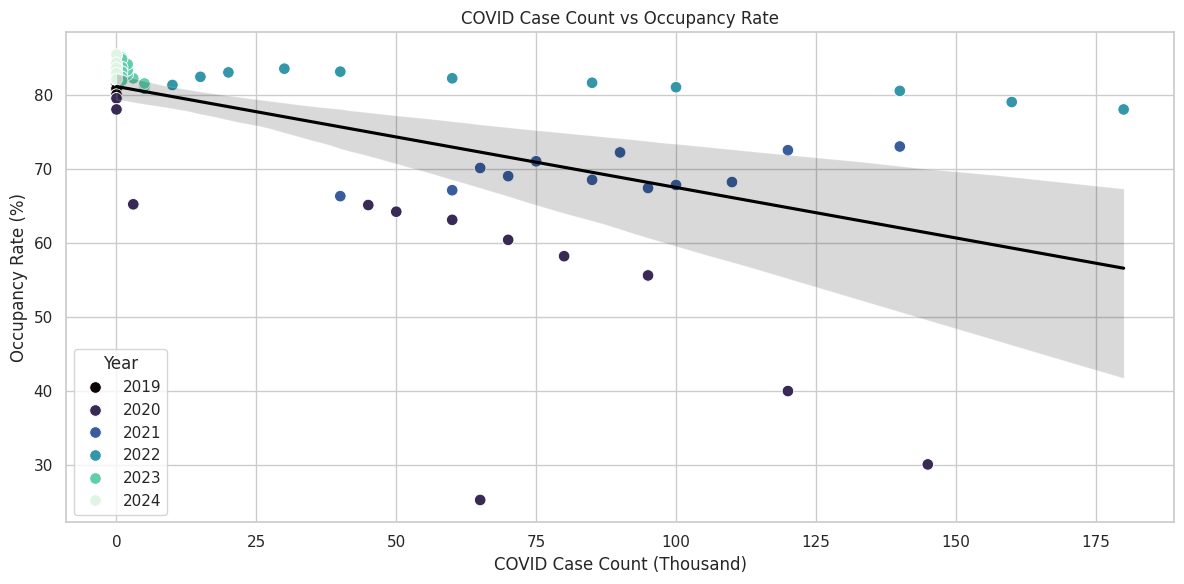

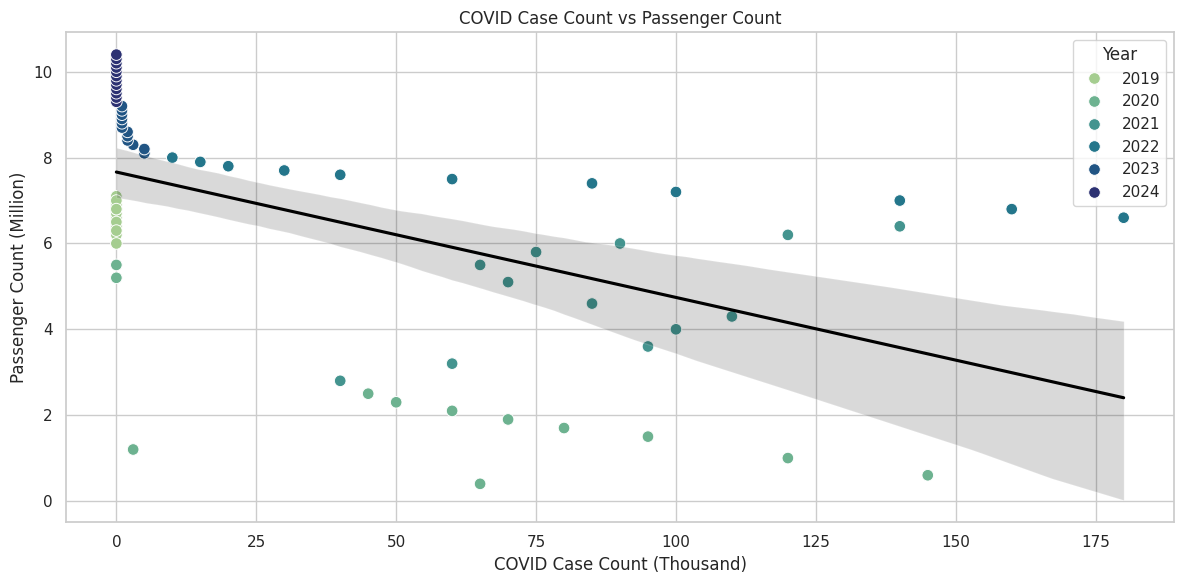

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort months in chronological order
df["Month"] = pd.Categorical(df["Month"], categories=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], ordered=True)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Occupancy Rate Time Series (by Year and Month)
plt.figure()
sns.lineplot(data=df, x="Month", y="Occupancy Rate (%)", hue="Year", marker="o")
plt.title("Monthly Occupancy Rate Time Series (2019–2024)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Passenger Count Time Series
plt.figure()
sns.lineplot(data=df, x="Date", y="Passenger Count (Million)", hue="Year", palette="tab10")
plt.title("Passenger Count Over Time (Million)")
plt.tight_layout()
plt.show()

# 3. Occupancy Rate vs Summer Holiday
plt.figure()
sns.boxplot(data=df, x="Is Summer Holiday? (1=Yes)", y="Occupancy Rate (%)")
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Occupancy Rate Distribution During Summer Holiday")
plt.tight_layout()
plt.show()

# 4. Occupancy Rate vs Inflation
plt.figure()
sns.scatterplot(data=df, x="Inflation (%)", y="Occupancy Rate (%)", hue="Year", palette="coolwarm", s=70)
sns.regplot(data=df, x="Inflation (%)", y="Occupancy Rate (%)", scatter=False, color="black")
plt.title("Occupancy Rate vs Inflation")
plt.tight_layout()
plt.show()

# 5. Occupancy Rate vs Fuel Price
plt.figure()
sns.scatterplot(data=df, x="Fuel Price (USD/Liter)", y="Occupancy Rate (%)", hue="Year", palette="viridis", s=70)
sns.regplot(data=df, x="Fuel Price (USD/Liter)", y="Occupancy Rate (%)", scatter=False, color="black")
plt.title("Occupancy Rate vs Fuel Price")
plt.tight_layout()
plt.show()

# 6. Monthly Passenger Count Distribution
plt.figure()
sns.boxplot(data=df, x="Month", y="Passenger Count (Million)")
plt.title("Monthly Passenger Count Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Correlation Heatmap (Including COVID)
plt.figure(figsize=(10, 6))
corr = df[["Occupancy Rate (%)", "Passenger Count (Million)", "Inflation (%)",
           "Fuel Price (USD/Liter)", "Holiday Days Count", "COVID Case Count (Thousand)"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Between Variables (Including COVID)")
plt.tight_layout()
plt.show()

# --- NEW: COVID-Related Analyses ---

# 8. Monthly COVID Case Time Series
plt.figure()
sns.lineplot(data=df, x="Date", y="COVID Case Count (Thousand)", hue="Year", palette="rocket", marker="o")
plt.title("Monthly COVID Case Count Over Time (Thousand)")
plt.tight_layout()
plt.show()

# 9. COVID Case Count vs Occupancy Rate
plt.figure()
sns.scatterplot(data=df, x="COVID Case Count (Thousand)", y="Occupancy Rate (%)", hue="Year", palette="mako", s=70)
sns.regplot(data=df, x="COVID Case Count (Thousand)", y="Occupancy Rate (%)", scatter=False, color="black")
plt.title("COVID Case Count vs Occupancy Rate")
plt.tight_layout()
plt.show()

# 10. COVID Case Count vs Passenger Count
plt.figure()
sns.scatterplot(data=df, x="COVID Case Count (Thousand)", y="Passenger Count (Million)", hue="Year", palette="crest", s=70)
sns.regplot(data=df, x="COVID Case Count (Thousand)", y="Passenger Count (Million)", scatter=False, color="black")
plt.title("COVID Case Count vs Passenger Count")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Sort months in chronological order
df["Month"] = pd.Categorical(df["Month"], categories=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], ordered=True)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# --- Hypothesis Tests ---
# Pre-COVID (2019)
pre_covid = df[df["Year"] == 2019]
# During-COVID (2020 and 2021)
during_covid = df[df["Year"].isin([2020, 2021])]

# 1. Occupancy Rate Comparison
t_stat1, p_val1 = ttest_ind(pre_covid["Occupancy Rate (%)"], during_covid["Occupancy Rate (%)"], alternative="greater")

print("\U0001f9ea Hypothesis Test 1: Occupancy Rate")
print(f"T-statistic: {t_stat1:.3f}, P-value: {p_val1:.3f}")
if p_val1 < 0.05:
    print("\U0001f534 H₀ rejected: Occupancy rate significantly LOWER during COVID.")
else:
    print("\U0001f7e2 H₀ not rejected: COVID effect on occupancy not statistically significant.")

# 2. Passenger Count Comparison
t_stat2, p_val2 = ttest_ind(pre_covid["Passenger Count (Million)"], during_covid["Passenger Count (Million)"], alternative="greater")

print("\n\U0001f9ea Hypothesis Test 2: Passenger Count")
print(f"T-statistic: {t_stat2:.3f}, P-value: {p_val2:.3f}")
if p_val2 < 0.05:
    print("\U0001f534 H₀ rejected: Passenger count significantly LOWER during COVID.")
else:
    print("\U0001f7e2 H₀ not rejected: No statistically significant difference in passenger count.")


🧪 Hypothesis Test 1: Occupancy Rate
T-statistic: 4.810, P-value: 0.000
🔴 H₀ rejected: Occupancy rate significantly LOWER during COVID.

🧪 Hypothesis Test 2: Passenger Count
T-statistic: 5.497, P-value: 0.000
🔴 H₀ rejected: Passenger count significantly LOWER during COVID.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr

# Sort months in chronological order
df["Month"] = pd.Categorical(df["Month"], categories=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], ordered=True)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# --- Hypothesis Tests ---
# Pre-COVID (2019)
pre_covid = df[df["Year"] == 2019]
# During-COVID (2020 and 2021)
during_covid = df[df["Year"].isin([2020, 2021])]

# 1. Occupancy Rate Comparison
t_stat1, p_val1 = ttest_ind(pre_covid["Occupancy Rate (%)"], during_covid["Occupancy Rate (%)"], alternative="greater")
print("\U0001f9ea Hypothesis Test 1: Occupancy Rate")
print(f"T-statistic: {t_stat1:.3f}, P-value: {p_val1:.3f}")
if p_val1 < 0.05:
    print("\U0001f534 H₀ rejected: Occupancy rate significantly LOWER during COVID.")
else:
    print("\U0001f7e2 H₀ not rejected: COVID effect on occupancy not statistically significant.")

# 2. Passenger Count Comparison
t_stat2, p_val2 = ttest_ind(pre_covid["Passenger Count (Million)"], during_covid["Passenger Count (Million)"], alternative="greater")
print("\n\U0001f9ea Hypothesis Test 2: Passenger Count")
print(f"T-statistic: {t_stat2:.3f}, P-value: {p_val2:.3f}")
if p_val2 < 0.05:
    print("\U0001f534 H₀ rejected: Passenger count significantly LOWER during COVID.")
else:
    print("\U0001f7e2 H₀ not rejected: No statistically significant difference in passenger count.")

# --- Additional T-Tests ---
# Summer holiday groups
holiday_yes = df[df["Is Summer Holiday? (1=Yes)"] == 1]
holiday_no = df[df["Is Summer Holiday? (1=Yes)"] == 0]

# Group by number of holiday days: 0–1 = Low, 2+ = High
df["Holiday Day Group"] = df["Holiday Days Count"].apply(lambda x: "Low" if x <= 1 else "High")
holiday_low = df[df["Holiday Day Group"] == "Low"]
holiday_high = df[df["Holiday Day Group"] == "High"]

# Post-COVID years
during_post_covid = df[df["Year"].isin([2022, 2023, 2024])]

def ttest_print(group1, group2, column, label1, label2):
    tstat, pval = ttest_ind(group1[column], group2[column])
    print(f"\n🧪 {column} | {label1} vs {label2}")
    print(f"T-statistic = {tstat:.3f}, P-value = {pval:.4f}")
    if pval < 0.05:
        print("🔴 Statistically significant difference.")
    else:
        print("🟢 No statistically significant difference.")

# 3: Fuel Price (Pre vs Post)
ttest_print(pre_covid, during_post_covid, "Fuel Price (USD/Liter)", "Pre-COVID", "Post-COVID")

# 4: Inflation (Pre vs Post)
ttest_print(pre_covid, during_post_covid, "Inflation (%)", "Pre-COVID", "Post-COVID")

# 5: Occupancy Rate (Summer holiday vs not)
ttest_print(holiday_yes, holiday_no, "Occupancy Rate (%)", "Summer Holiday", "No Holiday")

# 6: Passenger Count (Low vs High holiday days)
ttest_print(holiday_low, holiday_high, "Passenger Count (Million)", "Few Holidays", "More Holidays")

# --- Correlation Tests ---
def corr_print(x, y, label_x, label_y):
    r, p = pearsonr(df[x], df[y])
    print(f"\n📈 Pearson Correlation: {label_x} vs {label_y}")
    print(f"r = {r:.3f}, p = {p:.4f}")
    if p < 0.05:
        print("🔴 Statistically significant correlation.")
    else:
        print("🟢 No statistically significant correlation.")

# A: Fuel vs Inflation
corr_print("Fuel Price (USD/Liter)", "Inflation (%)", "Fuel Price", "Inflation")

# B: Inflation vs Occupancy
corr_print("Inflation (%)", "Occupancy Rate (%)", "Inflation", "Occupancy")

# C: Fuel vs Occupancy
corr_print("Fuel Price (USD/Liter)", "Occupancy Rate (%)", "Fuel Price", "Occupancy")

🧪 Hypothesis Test 1: Occupancy Rate
T-statistic: 4.810, P-value: 0.000
🔴 H₀ rejected: Occupancy rate significantly LOWER during COVID.

🧪 Hypothesis Test 2: Passenger Count
T-statistic: 5.497, P-value: 0.000
🔴 H₀ rejected: Passenger count significantly LOWER during COVID.

🧪 Fuel Price (USD/Liter) | Pre-COVID vs Post-COVID
T-statistic = -11.510, P-value = 0.0000
🔴 Statistically significant difference.

🧪 Inflation (%) | Pre-COVID vs Post-COVID
T-statistic = -4.262, P-value = 0.0001
🔴 Statistically significant difference.

🧪 Occupancy Rate (%) | Summer Holiday vs No Holiday
T-statistic = 0.009, P-value = 0.9928
🟢 No statistically significant difference.

🧪 Passenger Count (Million) | Few Holidays vs More Holidays
T-statistic = 0.494, P-value = 0.6228
🟢 No statistically significant difference.

📈 Pearson Correlation: Fuel Price vs Inflation
r = 0.404, p = 0.0004
🔴 Statistically significant correlation.

📈 Pearson Correlation: Inflation vs Occupancy
r = 0.248, p = 0.0359
🔴 Statistically s